In [3]:
import sys
sys.path.append("/content/drive/MyDrive/algo_trading_project/strategies")


In [4]:
!ls /content/drive/MyDrive/algo_trading_project/strategies


__pycache__  Strategy_functions.ipynb  strategy_functions.py


In [5]:
from strategy_functions import generate_macd_rsi_signals, run_backtest


📈 Best Performing Stock: BHARTIARTL.NS


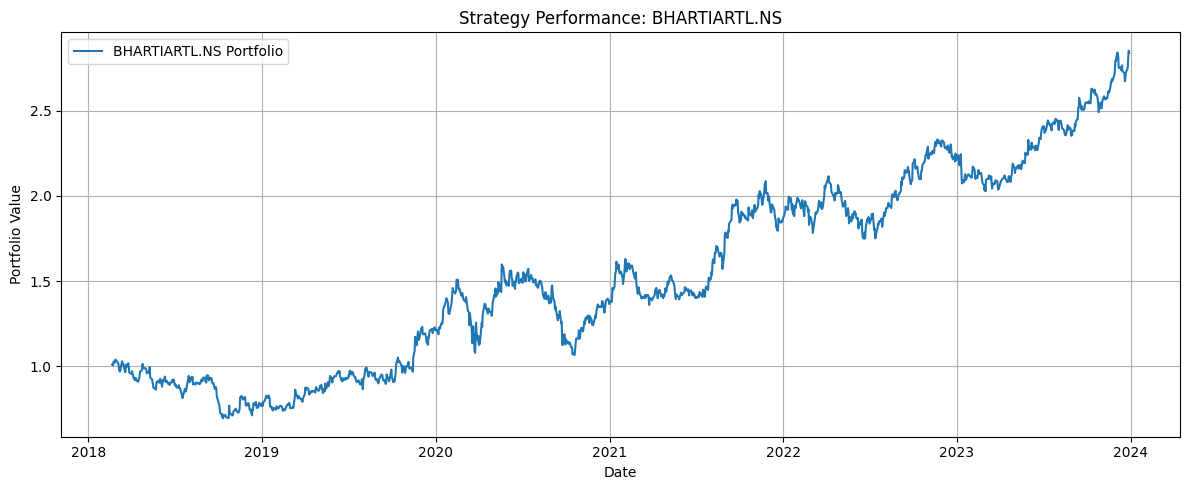

📉 Worst Performing Stock: LT.NS


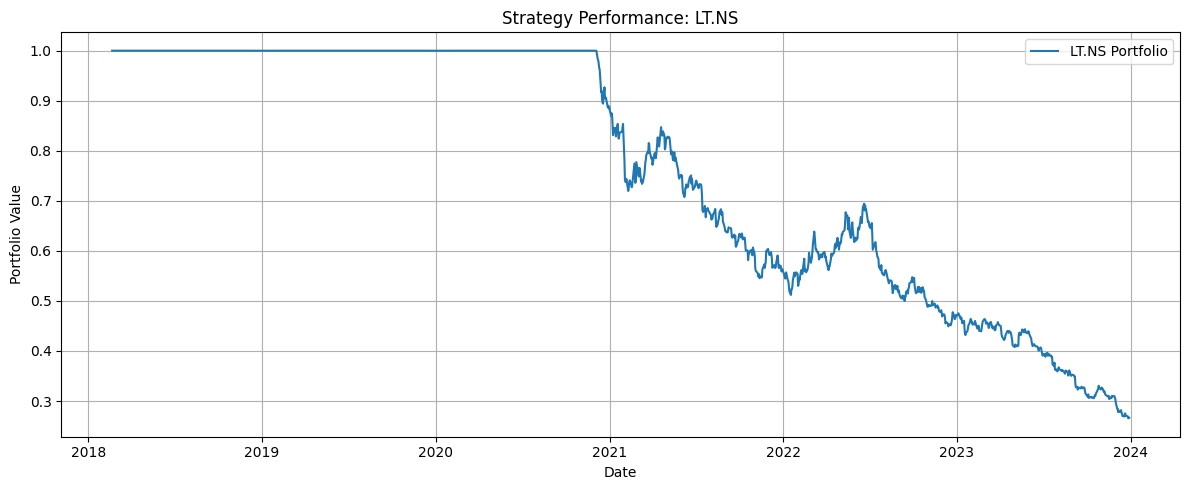

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the strategy results and feature data
results = pd.read_csv("/content/drive/MyDrive/algo_trading_project/results/strategy_results.csv")
features = pd.read_csv("/content/drive/MyDrive/algo_trading_project/data/nifty50_features.csv", parse_dates=["Date"])

best = results.sort_values("Sharpe Ratio", ascending=False).iloc[0]["Ticker"]
worst = results.sort_values("Sharpe Ratio", ascending=True).iloc[0]["Ticker"]

# --- Visualize ---
def plot_strategy(ticker):
    df_t = features[features["Ticker"] == ticker].sort_values("Date")
    df_t = generate_macd_rsi_signals(df_t)
    df_bt = run_backtest(df_t)

    plt.figure(figsize=(12, 5))
    plt.plot(df_bt["Date"], df_bt["Portfolio_Value"], label=f"{ticker} Portfolio")
    plt.title(f"Strategy Performance: {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Plot Best Performer ---
print(f"📈 Best Performing Stock: {best}")
plot_strategy(best)

# --- Plot Worst Performer ---
print(f"📉 Worst Performing Stock: {worst}")
plot_strategy(worst)
